# Carriers by Community
Analyzing carriers by community. This helps us understand which carriers dominate which communities in each quarter. We used this to look at the role of mergers & acquisition over the 25 year time span of the data.

In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import signac
from util import fetch_geodata, get_community

project = signac.get_project()
job = project.find_jobs({"year": 2011, "quarter": 1}).next()

In [2]:
communities = pd.read_csv(job.fn('hon_communities.csv'), usecols=['path', 'flow', 'ID', 'IATA', 'lon', 'lat'])
communities.path = communities.path.apply(lambda x: tuple(map(int, x[1:-1].split(', '))))

In [3]:
community = get_community(communities, (1,1))

In [4]:
carriers = pd.read_csv(job.fn('Coupon.csv'), usecols=['OriginAirportID', 'DestAirportID', 'TkCarrier'])

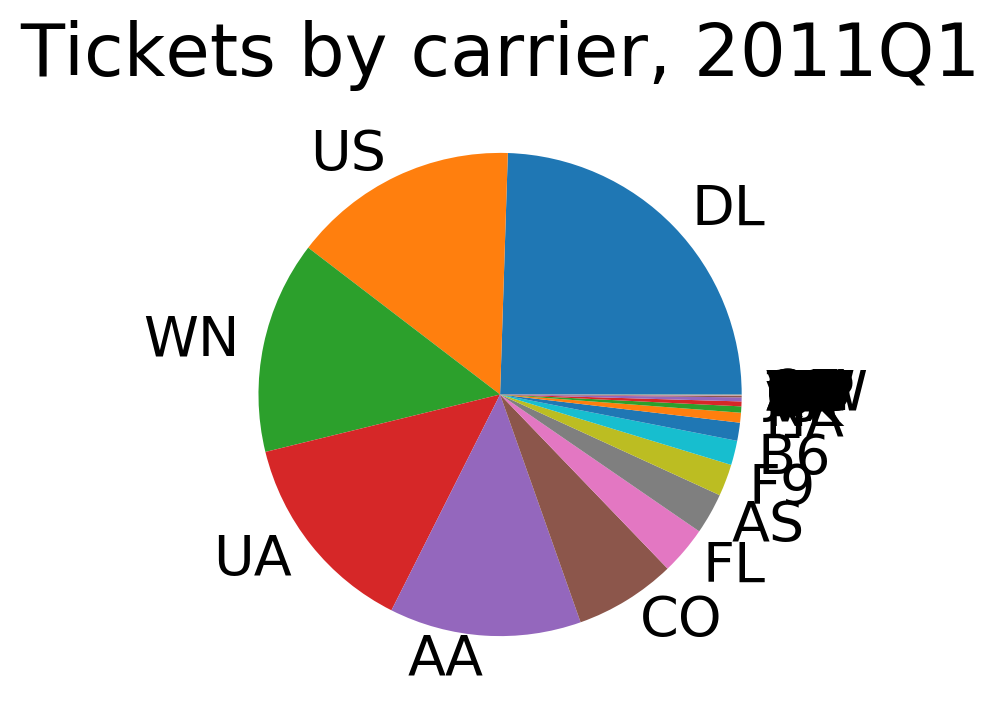

In [5]:
plt.figure(figsize=(6, 4), dpi=200)
carriers.TkCarrier.value_counts().plot.pie(fontsize=20)
plt.title('Tickets by carrier, {year}Q{quarter}'.format(**job.sp), fontsize=26)
plt.ylabel(None)
plt.show()

In [6]:
flows = community[['ID', 'flow']].groupby('ID').sum()
carrier_flows = pd.merge(carriers, flows, left_on='OriginAirportID', right_index=True)
carrier_flows = carrier_flows.rename(index=str, columns={'flow': 'OriginFlow'})
carrier_flows = pd.merge(carrier_flows, flows, left_on='DestAirportID', right_index=True)
carrier_flows = carrier_flows.rename(index=str, columns={'flow': 'DestFlow'})
carrier_flows['TotalFlow'] = carrier_flows['OriginFlow'] + carrier_flows['DestFlow']
carrier_flows = carrier_flows[['TkCarrier', 'TotalFlow']].groupby('TkCarrier').sum()

In [7]:
def plot_community_carriers(communities, carriers, community):
    print('Fetching community...')
    community_data = get_community(communities, community)
    print('Computing flows...')
    flows = community_data[['ID', 'flow']].groupby('ID').sum()
    print('Merging origin flows...')
    carrier_flows = pd.merge(carriers, flows, left_on='OriginAirportID', right_index=True)
    carrier_flows = carrier_flows.rename(index=str, columns={'flow': 'OriginFlow'})
    print('Merging destination flows...')
    carrier_flows = pd.merge(carrier_flows, flows, left_on='DestAirportID', right_index=True)
    carrier_flows = carrier_flows.rename(index=str, columns={'flow': 'DestFlow'})
    print('Computing total flows...')
    carrier_flows['TotalFlow'] = carrier_flows['OriginFlow'] + carrier_flows['DestFlow']
    carrier_flows = carrier_flows[['TkCarrier', 'TotalFlow']].groupby('TkCarrier').sum()
    carrier_flows = carrier_flows.sort_values('TotalFlow', ascending=False)
    print('Plotting results...')
    plt.figure(figsize=(6, 4), dpi=200)
    carrier_flows.TotalFlow.plot.pie(fontsize=20)
    plt.title('Carriers weighted by community flow,\n{year}Q{quarter} Community {community}'.format(
        **job.sp, community=community), fontsize=26)
    plt.ylabel(None)
    plt.show()

Fetching community...
Computing flows...
Merging origin flows...
Merging destination flows...
Computing total flows...
Plotting results...


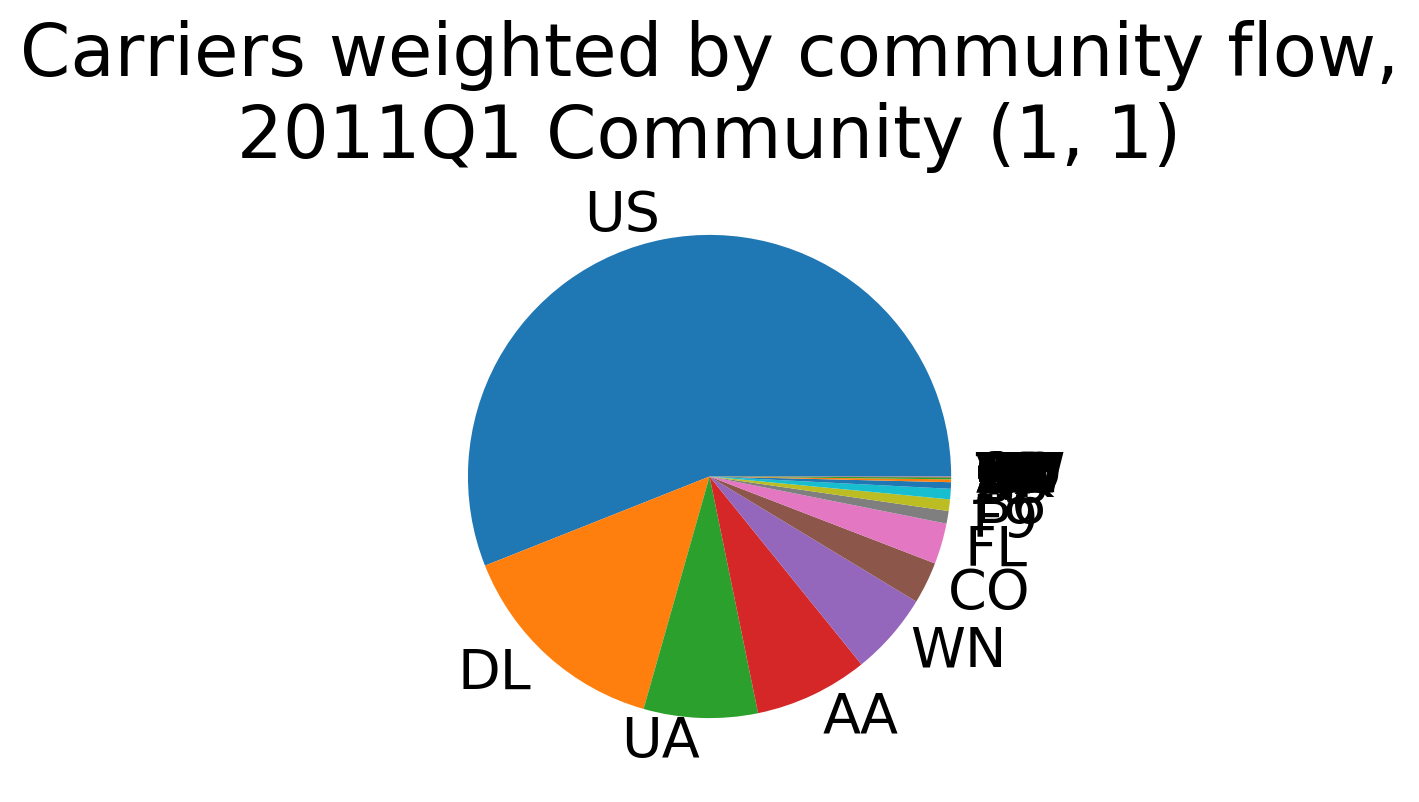

Fetching community...
Computing flows...
Merging origin flows...
Merging destination flows...
Computing total flows...
Plotting results...


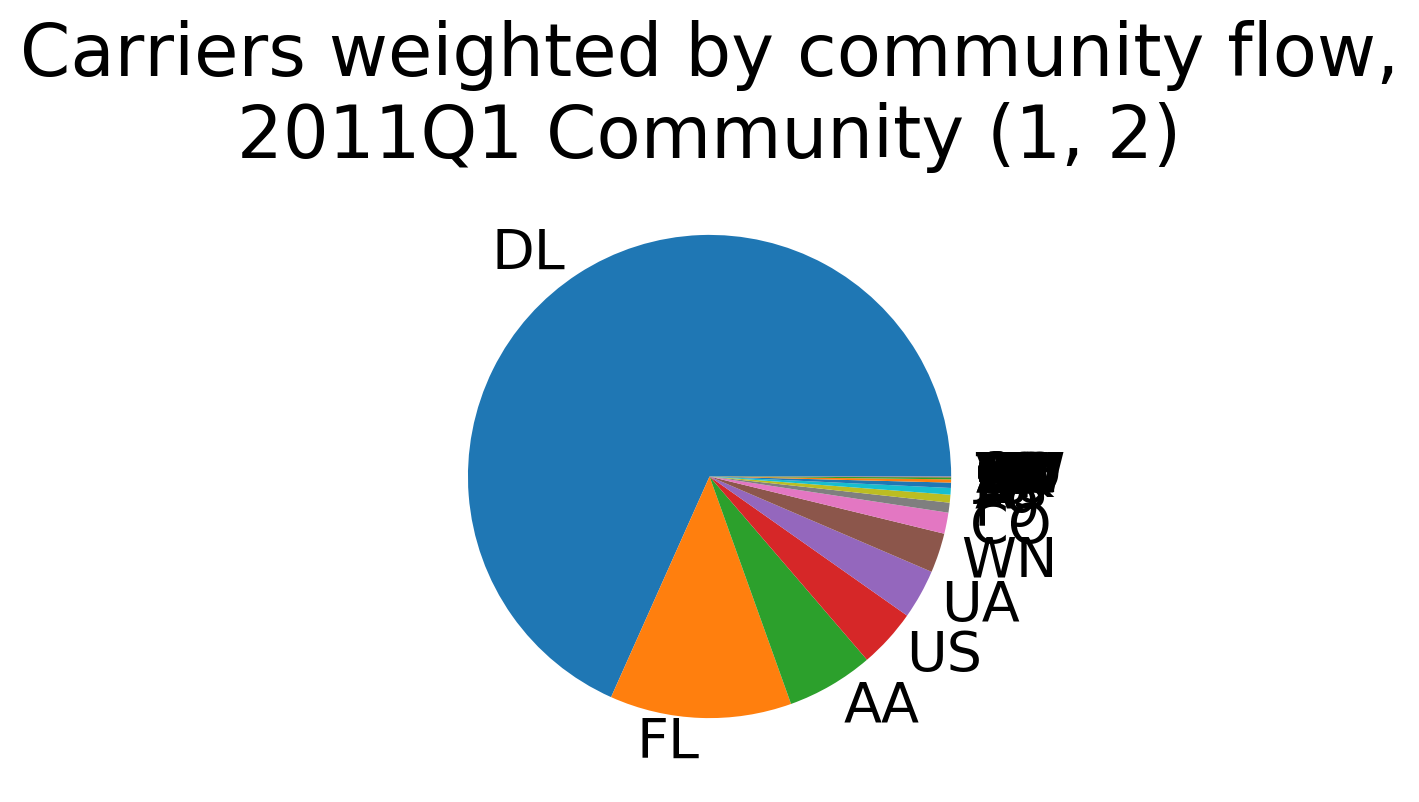

Fetching community...
Computing flows...
Merging origin flows...
Merging destination flows...
Computing total flows...
Plotting results...


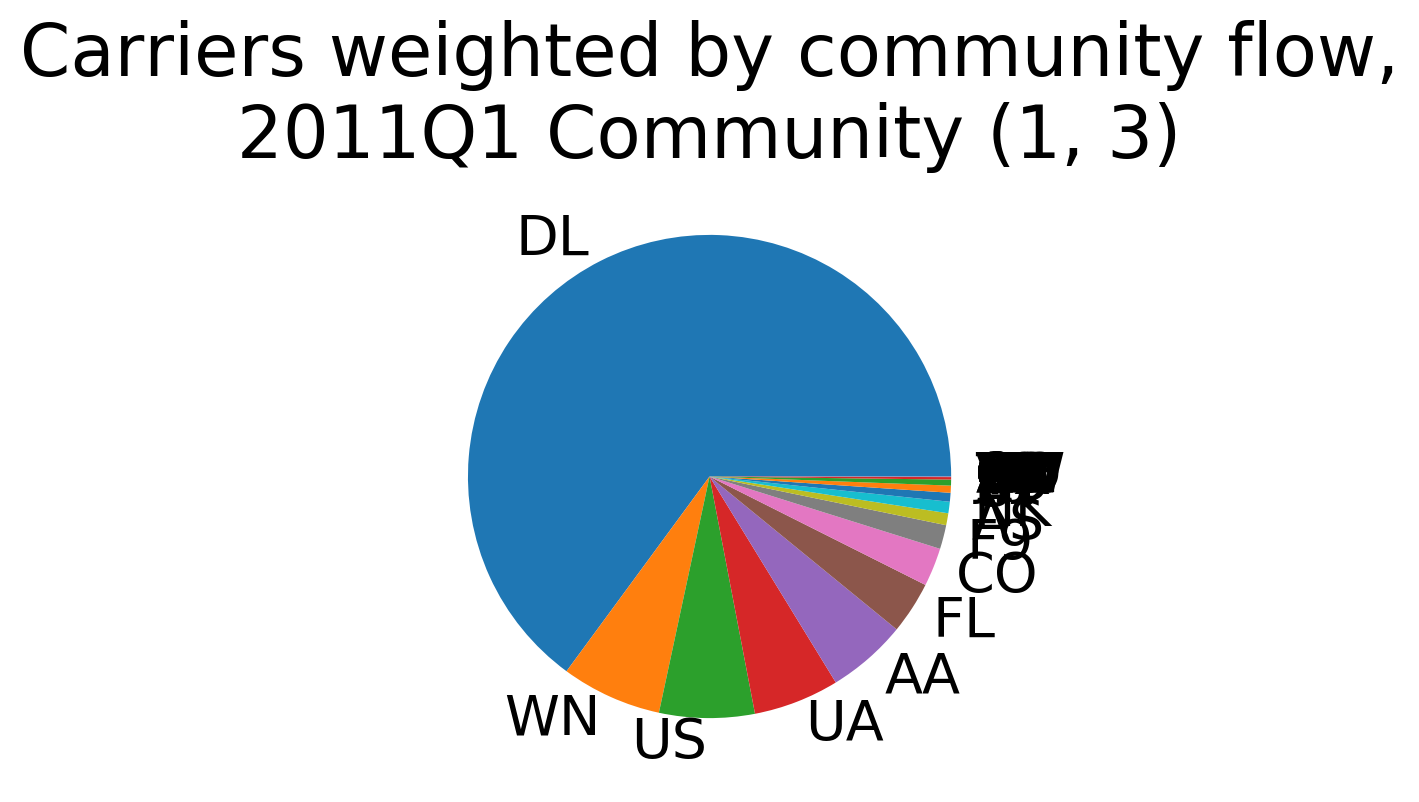

Fetching community...
Computing flows...
Merging origin flows...
Merging destination flows...
Computing total flows...
Plotting results...


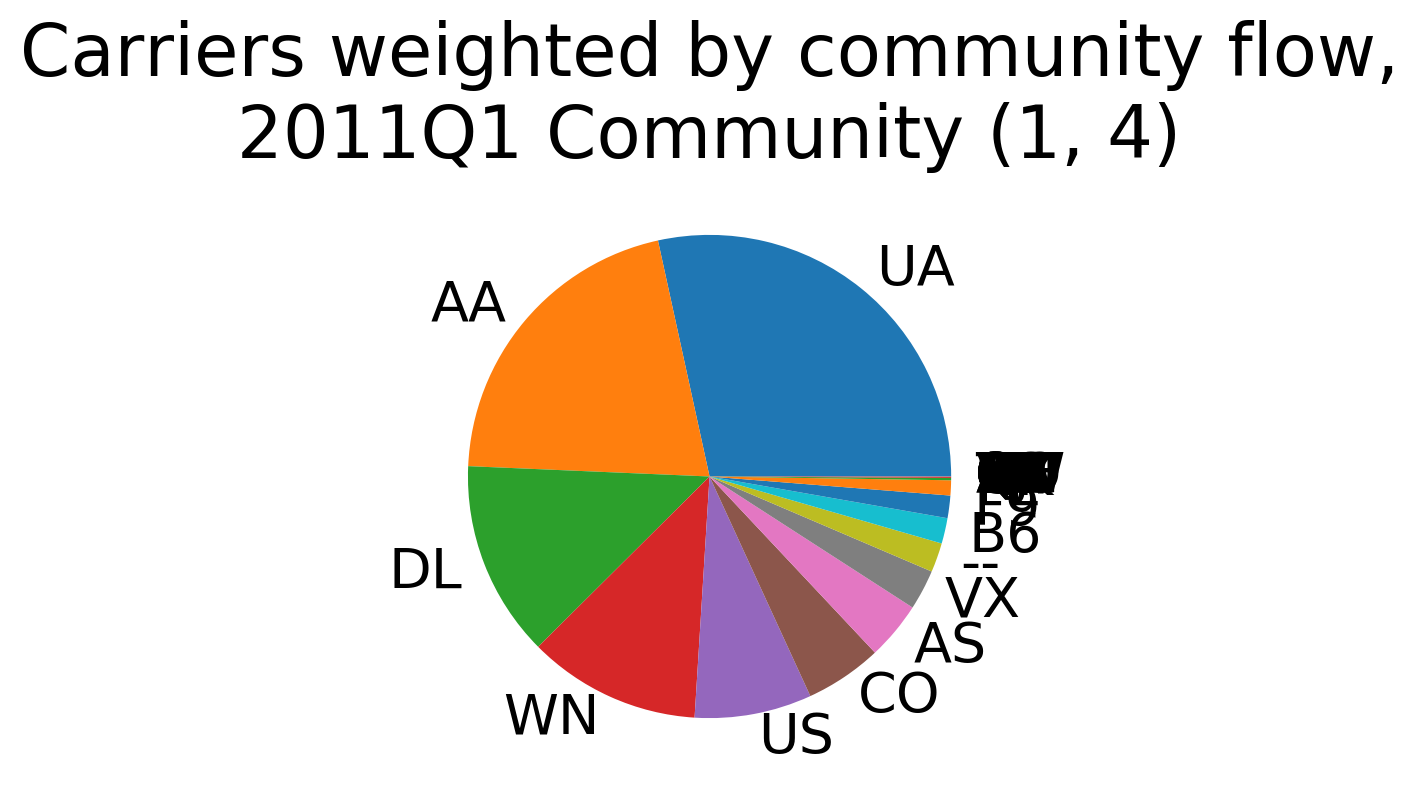

Fetching community...
Computing flows...
Merging origin flows...
Merging destination flows...
Computing total flows...
Plotting results...


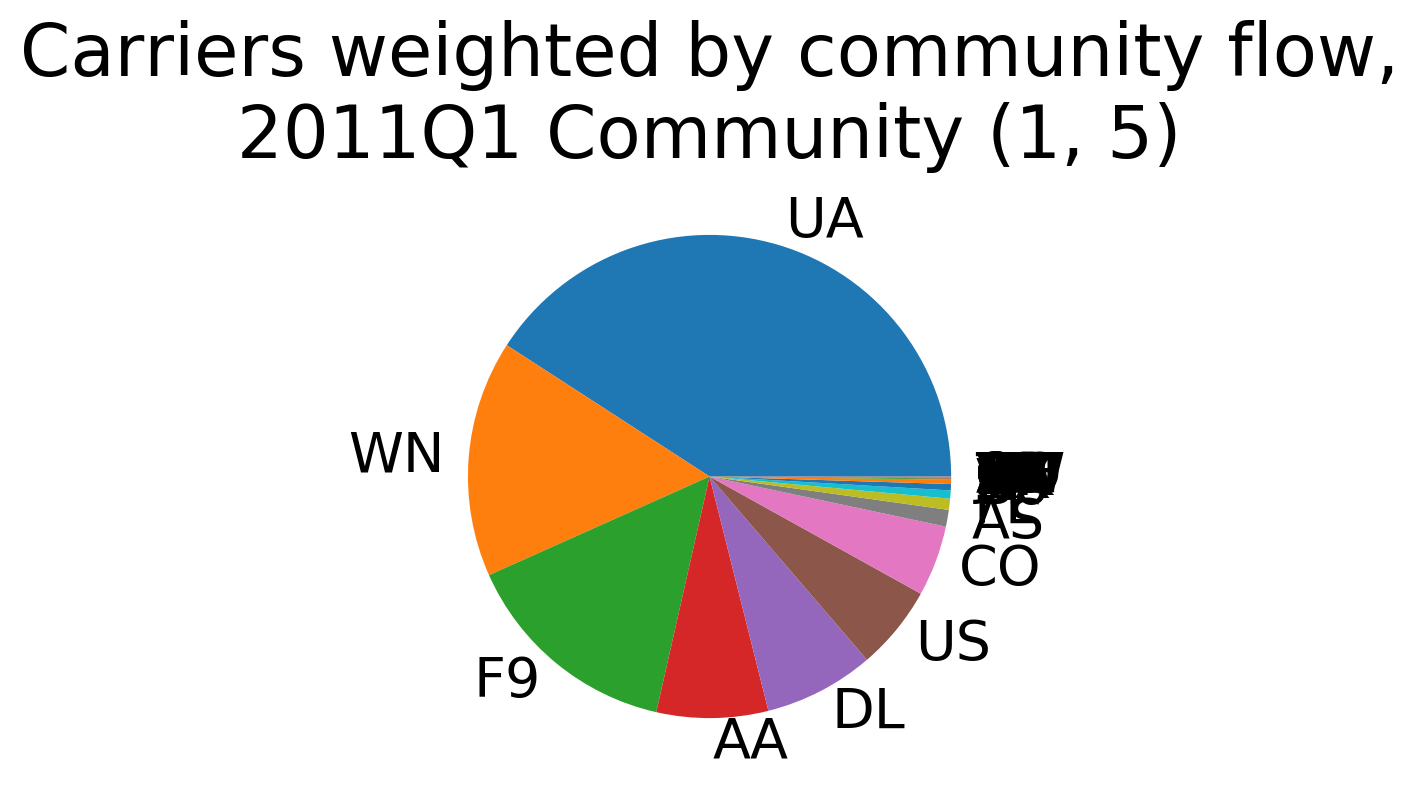

In [8]:
for i in range(1, 6):
    plot_community_carriers(communities, carriers, (1, i))